### DATASETS DE TRABAJO

In [59]:
import pandas as pd
import numpy as np

df_1 = pd.read_csv("C:/Users/vsuar/Documents/THE BRIDGE/EDA/BBDD/release_data.csv", sep=',')
df_1

,release_id,country,year,genre,format
0,1,Sweden,1999.0,Electronic,Vinyl
1,2,Sweden,1998.0,Electronic,Vinyl
2,3,US,1999.0,Electronic,CD
3,4,US,1999.0,Electronic,CD
4,5,Germany,1995.0,Electronic,CD
...,...,...,...,...,...
17372030,15731745,Peru,1980.0,Pop,Vinyl
17372031,15731748,Mexico,1975.0,Latin,Vinyl
17372032,15731752,Czech Republic,2020.0,Electronic,Vinyl
17372033,15731758,Canada,2007.0,Electronic,Vinyl


### LIMPIEZA DE LOS DATASETS

**Empiezo a limpiar la base de datos**

Me quito los valores por encima de 2020 y transformo el tipo decimal (float) de la columna de año a entero (integer).

In [60]:
df_1.dropna(subset=['release_id','genre', 'format', 'year', 'country'], inplace=True)
df_1

,release_id,country,year,genre,format
0,1,Sweden,1999.0,Electronic,Vinyl
1,2,Sweden,1998.0,Electronic,Vinyl
2,3,US,1999.0,Electronic,CD
3,4,US,1999.0,Electronic,CD
4,5,Germany,1995.0,Electronic,CD
...,...,...,...,...,...
17372030,15731745,Peru,1980.0,Pop,Vinyl
17372031,15731748,Mexico,1975.0,Latin,Vinyl
17372032,15731752,Czech Republic,2020.0,Electronic,Vinyl
17372033,15731758,Canada,2007.0,Electronic,Vinyl


In [61]:
df_1['year'] = df_1['year'].round().astype(int)
df_1

,release_id,country,year,genre,format
0,1,Sweden,1999,Electronic,Vinyl
1,2,Sweden,1998,Electronic,Vinyl
2,3,US,1999,Electronic,CD
3,4,US,1999,Electronic,CD
4,5,Germany,1995,Electronic,CD
...,...,...,...,...,...
17372030,15731745,Peru,1980,Pop,Vinyl
17372031,15731748,Mexico,1975,Latin,Vinyl
17372032,15731752,Czech Republic,2020,Electronic,Vinyl
17372033,15731758,Canada,2007,Electronic,Vinyl


In [62]:
# Me voy a centrar únicamente en los años en los que hay vinilos
primer_formato = df_1.groupby('format')['year'].min()
primer_formato

format
4-Track Cartridge     1959
8-Track Cartridge     1958
Acetate               1903
All Media             1860
Betacam               1986
Betacam SP            1988
Betamax               1975
Blu-ray               2001
Blu-ray-R             2005
Box Set               1916
CD                    1973
CDV                   1982
Cartrivision          1972
Cassette              1963
Cylinder              1878
DAT                   1986
DC-International      1965
DCC                   1986
DVD                   1996
DVDr                  1984
DualDisc              2007
Edison Disc           1913
Elcaset               1977
File                  1980
Film Reel             1956
Flexi-disc            1921
Floppy Disk           1986
HD DVD                1978
HD DVD-R              2020
Hybrid                1984
Laserdisc             1980
Lathe Cut             1933
MVD                   2002
Memory Stick          2000
Microcassette         1981
MiniDV                2001
Minidisc             

In [63]:
df_1 = df_1.loc[(df_1['year'] >= 1925) & (df_1['year'] <= 2020)]
df_1.head()

,release_id,country,year,genre,format
0,1,Sweden,1999,Electronic,Vinyl
1,2,Sweden,1998,Electronic,Vinyl
2,3,US,1999,Electronic,CD
3,4,US,1999,Electronic,CD
4,5,Germany,1995,Electronic,CD


In [64]:
# Al encontrarme con problemas en los valores que contenían varios países, he decidido usar valores con un solo país.
df_1 = df_1[~df_1['country'].astype(str).str.contains('&')]
df_1

,release_id,country,year,genre,format
0,1,Sweden,1999,Electronic,Vinyl
1,2,Sweden,1998,Electronic,Vinyl
2,3,US,1999,Electronic,CD
3,4,US,1999,Electronic,CD
4,5,Germany,1995,Electronic,CD
...,...,...,...,...,...
17372030,15731745,Peru,1980,Pop,Vinyl
17372031,15731748,Mexico,1975,Latin,Vinyl
17372032,15731752,Czech Republic,2020,Electronic,Vinyl
17372033,15731758,Canada,2007,Electronic,Vinyl


In [65]:
df_1['country'].unique()

array(['Sweden', 'US', 'Germany', 'Canada', 'UK', 'France', 'Portugal',
       'Belgium', 'Finland', 'Switzerland', 'Netherlands', 'Europe',
       'Australia', 'Benelux', 'Greece', 'Denmark', 'Russia', 'Italy',
       'Czech Republic', 'Ireland', 'Japan', 'Scandinavia', 'Mexico',
       'Austria', 'Hong Kong', 'Spain', 'Norway', 'Slovenia', 'Ukraine',
       'Iceland', 'Slovakia', 'North America (inc Mexico)', 'New Zealand',
       'Croatia', 'Hungary', 'Argentina', 'Malaysia', 'Australasia',
       'Estonia', 'Israel', 'Cyprus', 'Brazil', 'Poland', 'Belarus',
       'Taiwan', 'German Democratic Republic (GDR)', 'Lithuania',
       'South Africa', 'Jamaica', 'Chile', 'Bulgaria', 'Puerto Rico',
       'Turkey', 'Yugoslavia', 'Peru', 'China', 'Singapore', 'Serbia',
       'Egypt', 'Ecuador', 'South Korea', 'India', 'Liechtenstein',
       'Venezuela', 'Serbia and Montenegro', 'Philippines',
       'Czechoslovakia', 'USSR', 'Asia', 'Latvia', 'Malta', 'Romania',
       'Luxembourg', 'Unit

In [66]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14591445 entries, 0 to 17372034
Data columns (total 5 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   release_id  int64 
 1   country     object
 2   year        int32 
 3   genre       object
 4   format      object
dtypes: int32(1), int64(1), object(3)
memory usage: 612.3+ MB


In [67]:
hay_nan = df_1.isna().any().any()

if hay_nan:
    print("Hay valores NaN en el DataFrame")
else:
    print("No hay valores NaN en el DataFrame")

No hay valores NaN en el DataFrame


In [68]:
columnas_seleccionadas = ['country', 'genre', 'format']
descripcion = df_1[columnas_seleccionadas].describe()
descripcion

,country,genre,format
count,14591445,14591445,14591445
unique,255,15,54
top,US,Rock,Vinyl
freq,3496369,3881282,6342496


In [69]:
df_1.describe()

,release_id,year
count,1.459144e+07,1.459144e+07
mean,7.533488e+06,1.995047e+03
std,4.562188e+06,1.756289e+01
min,1.000000e+00,1.925000e+03
25%,3.484054e+06,1.983000e+03
50%,7.271969e+06,1.998000e+03
75%,1.153483e+07,2.010000e+03
max,1.573176e+07,2.020000e+03


**Empiezo el análisis**

In [70]:
# Primero quiero averiguar cuántos países hay

paises = df_1['country'].nunique()
paises

255

In [71]:
# 1. Limpio por los países con más registros.
paises_mas_datos = df_1['country'].value_counts().head(10)
paises_mas_datos

US             3496369
UK             1883843
Germany        1233830
Japan           725212
France          716915
Europe          590001
Italy           588842
Canada          523908
Spain           462080
Netherlands     457162
Name: country, dtype: int64

In [72]:
top_paises = ['UK', 'US', 'Germany', 'Japan', 'France']

df_1 = df_1[df_1['country'].isin(top_paises)]
df_1

,release_id,country,year,genre,format
2,3,US,1999,Electronic,CD
3,4,US,1999,Electronic,CD
4,5,Germany,1995,Electronic,CD
6,7,US,2000,Electronic,Vinyl
7,8,US,2000,Electronic,Vinyl
...,...,...,...,...,...
17372015,15731725,US,2020,Hip Hop,Vinyl
17372017,15731729,UK,2020,Electronic,File
17372022,15731734,US,1957,Jazz,Shellac
17372023,15731735,France,1997,"Folk, World, & Country",CD


In [73]:
# 2. Limpio por los formatos con más registros.
formatos_mas_datos = df_1['format'].value_counts().head(10)
formatos_mas_datos

Vinyl                3662430
CD                   2782132
File                  726244
Cassette              498102
Shellac               114258
DVD                    73548
Box Set                49170
All Media              29906
VHS                    23023
8-Track Cartridge      21652
Name: format, dtype: int64

In [74]:
top_formatos = ['Vinyl', 'CD', 'File', 'Cassette', 'Shellac']

df_1 = df_1[df_1['format'].isin(top_formatos)]
df_1

,release_id,country,year,genre,format
2,3,US,1999,Electronic,CD
3,4,US,1999,Electronic,CD
4,5,Germany,1995,Electronic,CD
6,7,US,2000,Electronic,Vinyl
7,8,US,2000,Electronic,Vinyl
...,...,...,...,...,...
17372015,15731725,US,2020,Hip Hop,Vinyl
17372017,15731729,UK,2020,Electronic,File
17372022,15731734,US,1957,Jazz,Shellac
17372023,15731735,France,1997,"Folk, World, & Country",CD


In [75]:
generos = df_1['genre'].unique()
generos

array(['Electronic', 'Hip Hop', 'Non-Music', 'Jazz', 'Latin',
       'Funk / Soul', 'Rock', 'Stage & Screen', 'Pop', 'Reggae',
       'Folk, World, & Country', 'Classical', 'Blues', 'Brass & Military',
       "Children's"], dtype=object)

In [76]:
generos_mas_datos = df_1['genre'].value_counts().head(10)
generos_mas_datos.head(5)

Rock                      2079627
Electronic                1835905
Pop                        938835
Folk, World, & Country     533550
Jazz                       527358
Name: genre, dtype: int64

In [77]:
df_vinyl = df_1[df_1['format'] == 'Vinyl']

# Obtener el conteo de géneros por número de vinilos
generos_por_vinilo = df_vinyl['genre'].value_counts()

# Imprimir los géneros ordenados por número de vinilos
generos_por_vinilo.head(5)


Rock                      936502
Electronic                725895
Pop                       488298
Funk / Soul               352618
Folk, World, & Country    270090
Name: genre, dtype: int64

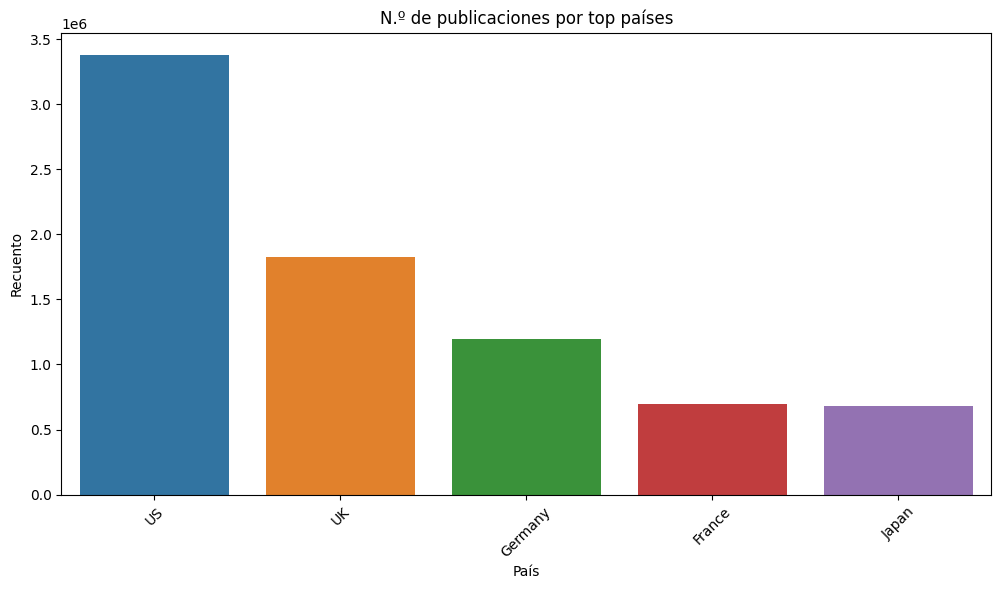

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

release_by_country = (df_1.groupby('country')['release_id']
                      .count()
                      .reset_index(name='count')
                      .sort_values(['count'], ascending=False)
                      .head(20))


plt.figure(figsize=(12, 6))
sns.barplot(data=release_by_country, x='country', y='count')
plt.title('N.º de publicaciones por top países')
plt.xlabel('País')
plt.ylabel('Recuento')
plt.xticks(rotation=45)
plt.show()


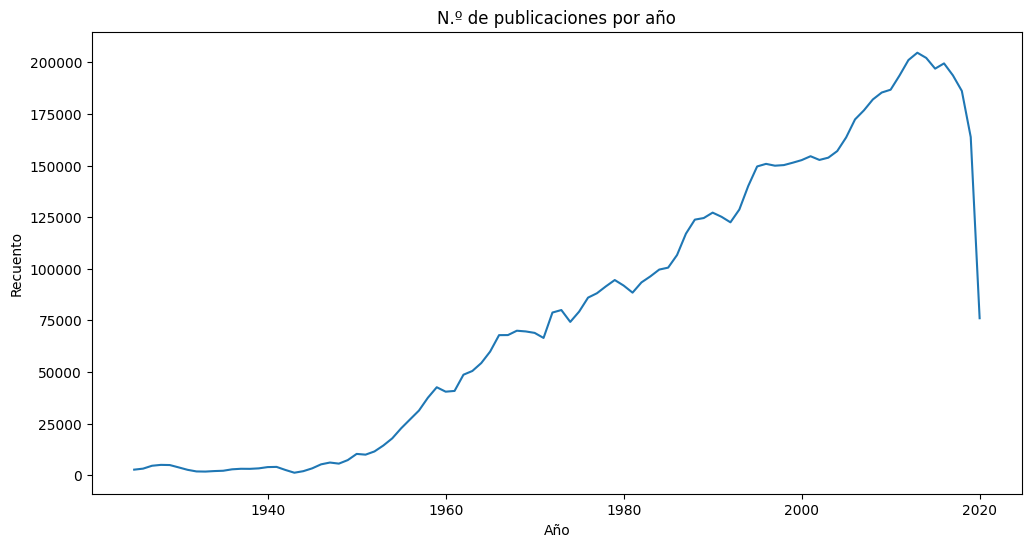

In [106]:
release_by_year = (df_1.groupby('year')['release_id']
                   .count()
                   .reset_index(name='count'))

plt.figure(figsize=(12, 6))
sns.lineplot(data=release_by_year, x='year', y='count')
plt.title('N.º de publicaciones por año')
plt.xlabel('Año')
plt.ylabel('Recuento')
plt.show()

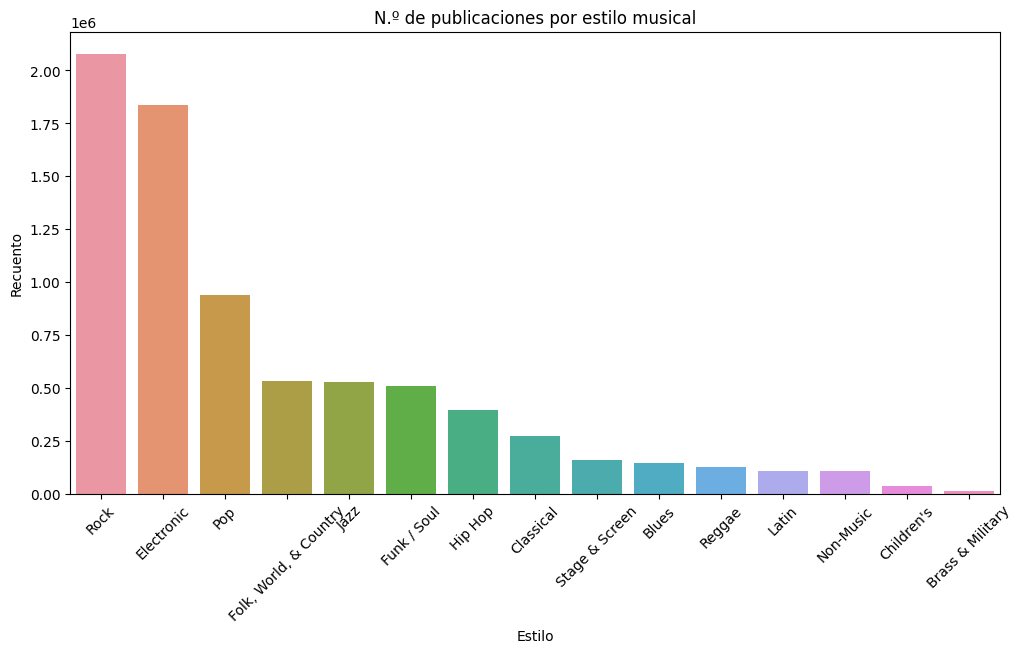

In [109]:
release_by_genre = (df_1.groupby('genre')['release_id']
                    .count()
                    .reset_index(name='count')
                    .sort_values(['count'], ascending=False)
                    .head(15))

plt.figure(figsize=(12, 6))
sns.barplot(data=release_by_genre, x='genre', y='count')
plt.title('N.º de publicaciones por estilo musical')
plt.xlabel('Estilo')
plt.ylabel('Recuento')
plt.xticks(rotation=45)
plt.show()

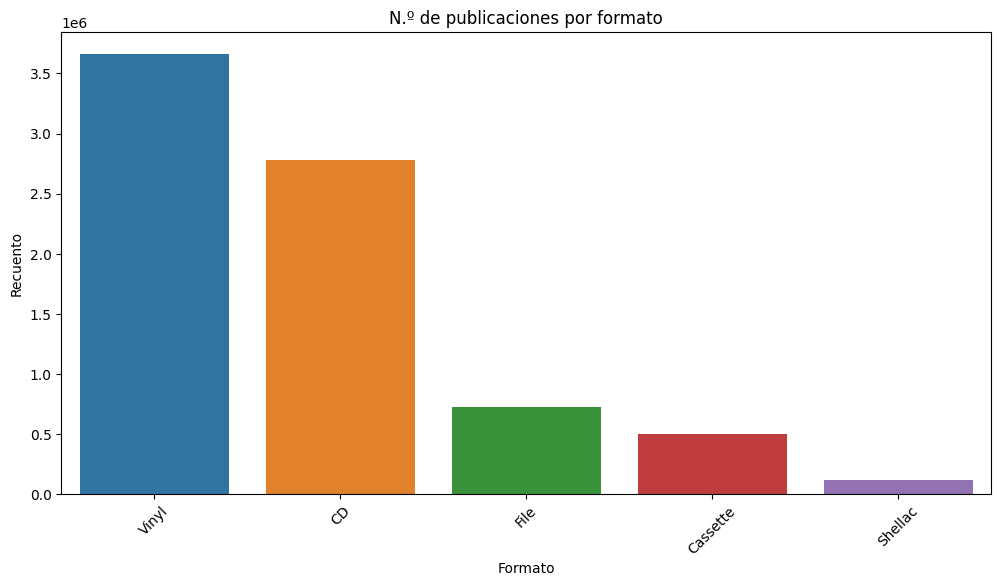

In [110]:
release_by_format = (df_1.groupby('format')['release_id']
                     .count()
                     .reset_index(name='count')
                     .sort_values(['count'], ascending=False))

plt.figure(figsize=(12, 6))
sns.barplot(data=release_by_format, x='format', y='count')
plt.title('N.º de publicaciones por formato')
plt.xlabel('Formato')
plt.ylabel('Recuento')
plt.xticks(rotation=45)
plt.show()

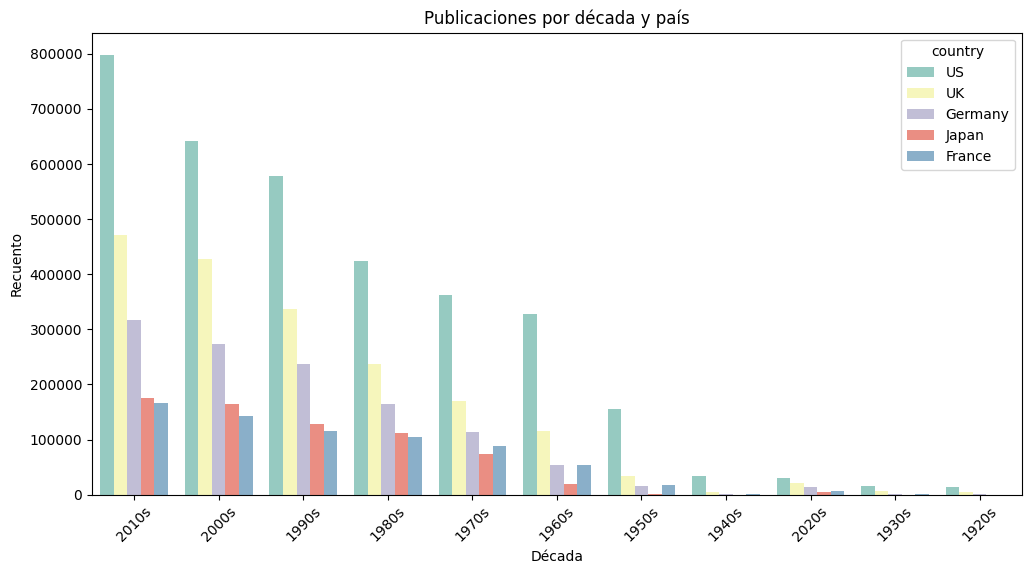

In [111]:
release_by_country_year = df_1.groupby(['country', df_1['year'] // 10 * 10])['release_id'].count().reset_index(name='count').sort_values('count', ascending=False)

release_by_country_year['year'] = release_by_country_year['year'].astype(str) + 's'

plt.figure(figsize=(12, 6))
sns.barplot(data=release_by_country_year, x='year', y='count', hue='country', palette='Set3')
plt.title('Publicaciones por década y país')
plt.xlabel('Década')
plt.ylabel('Recuento')
plt.xticks(rotation=45)
plt.show()


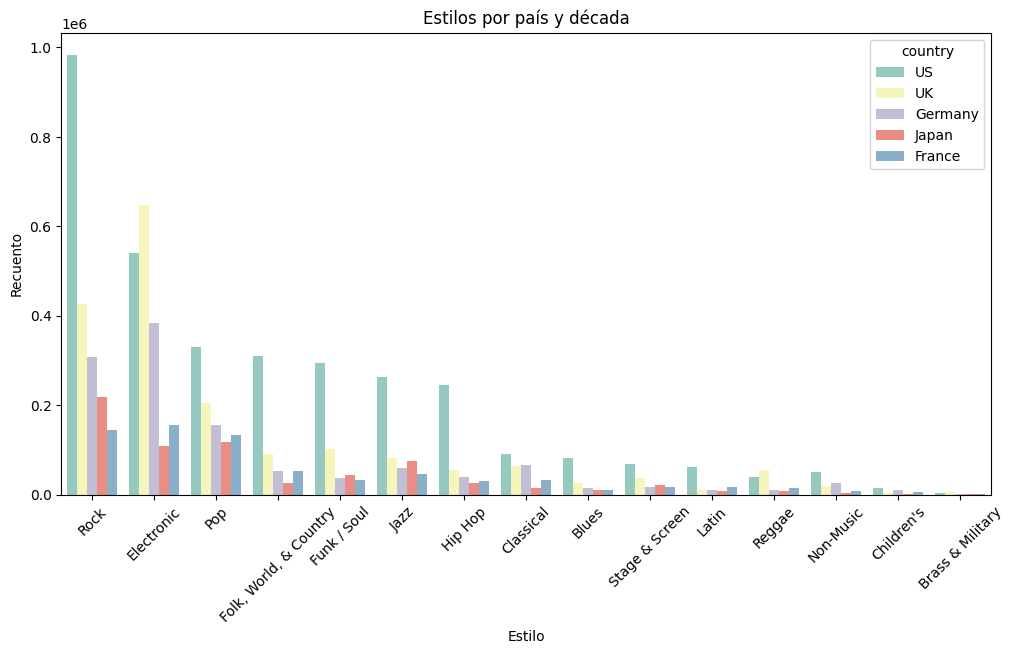

In [112]:
release_by_genre_country = df_1.groupby(['genre', 'country'])['release_id'].count().reset_index(name='count').sort_values(['count'], ascending=False)

release_by_genre_country['year'] = df_1['year'] // 10 * 10

countries = df_1['country'].value_counts().head(10)

genres_decades = release_by_genre_country[release_by_genre_country['country'].isin(countries.index)]

plt.figure(figsize=(12, 6))
sns.barplot(data=genres_decades, x='genre', y='count', hue='country', palette='Set3')
plt.title('Estilos por país y década')
plt.xlabel('Estilo')
plt.ylabel('Recuento')
plt.xticks(rotation=45)
plt.show()

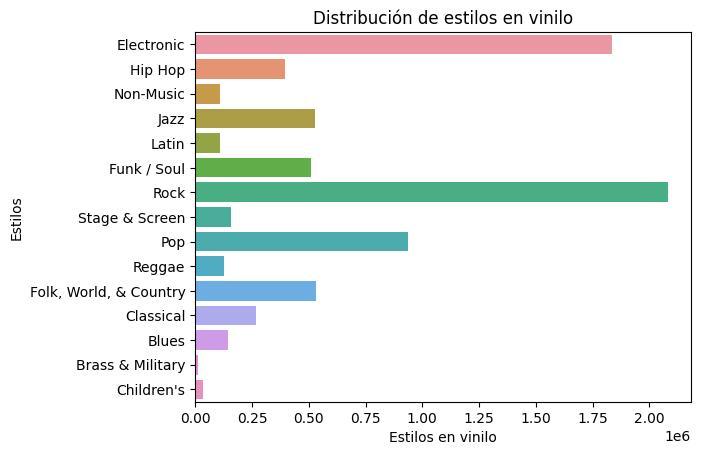

In [113]:
estilos_vinilo = df_1['genre'].unique()

sns.countplot(y='genre', data=df_1, order=estilos_vinilo)
plt.xlabel('Estilos en vinilo')
plt.ylabel('Estilos')
plt.title('Distribución de estilos en vinilo')
plt.show()


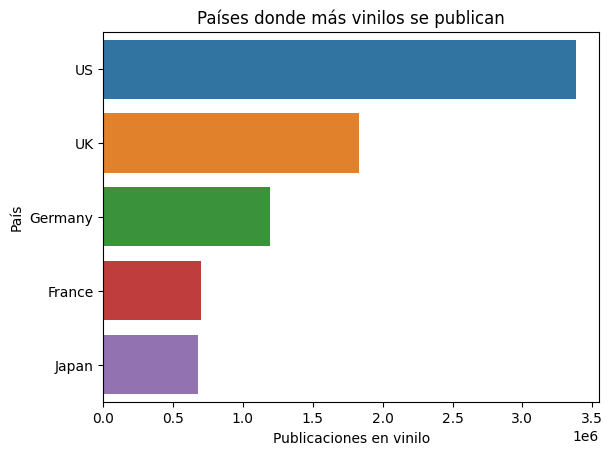

In [114]:
top_countries = df_1['country'].value_counts().head(10)

sns.barplot(x=top_countries.values, y=top_countries.index)
plt.xlabel('Publicaciones en vinilo')
plt.ylabel('País')
plt.title('Países donde más vinilos se publican')
plt.show()


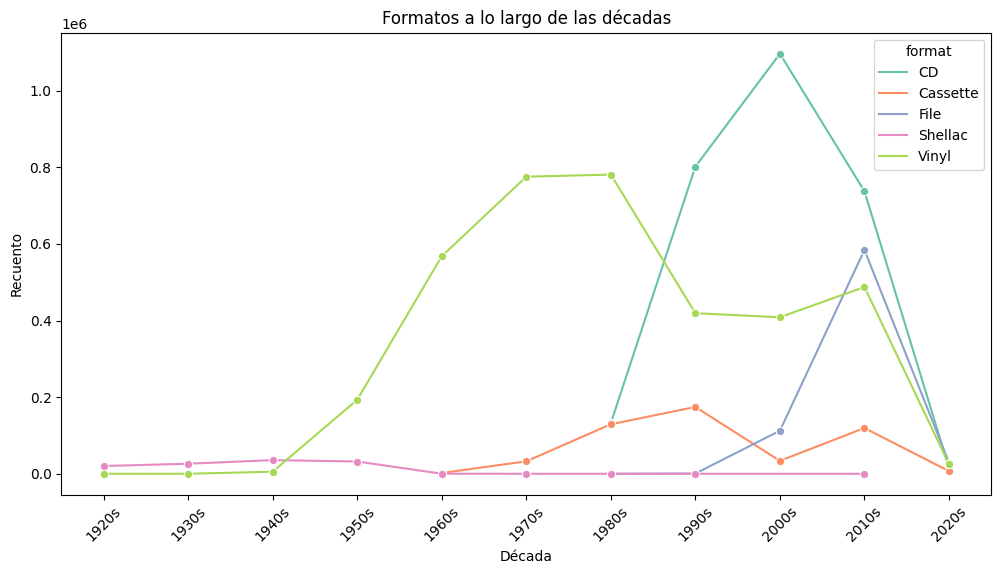

In [117]:

format_year = df_1.groupby(['format', df_1['year'] // 10 * 10])['release_id'].count().reset_index(name='count')

format_year['year'] = format_year['year'].astype(str) + 's'

decades = sorted(format_year['year'].unique())

format_year['year'] = pd.Categorical(format_year['year'], categories=decades, ordered=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=format_year, x='year', y='count', hue='format', palette='Set2', marker='o')
plt.title('Formatos a lo largo de las décadas')
plt.xlabel('Década')
plt.ylabel('Recuento')
plt.xticks(rotation=45)
plt.show()